In [225]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

from pycoingecko import CoinGeckoAPI
from prophet import Prophet

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Monospace"


In [253]:
class CoinPredict():
    '''
    identifier: coin id from coingecko API
    start_timestamp, end_timestamp: period for historical data by timestamp
    period: period of prediction by Prophet
    
    EXAMPLE:
    >>> identifier = "bitcoin"
    >>> start_timestamp = datetime(2018,5,1)
    >>> start_timestamp = datetime.timestamp(start_timestamp)
    >>> end_timestamp = datetime.timestamp(datetime.utcnow())
    >>> period = 365 #days
    >>> cp = CoinPredict(identifier=identifier,start_timestamp=start_timestamp,
                                end_timestamp=end_timestamp, period=period)
    # By default mcap=True.
    # if False return prices prediction, if True return market cap. prediction
    >>> cp.prophet(mcap=True)
    '''
    
    def __init__(self, identifier, start_timestamp, end_timestamp, period):
        self.cg = CoinGeckoAPI()
        self.identifier = identifier
        self.start_timestamp = start_timestamp
        self.end_timestamp = end_timestamp
        self.data = self.get_data()
        self.period = period
        self.fig = plt.figure(figsize=(20,10))
    
    def get_data(self):
        raw = self.cg.get_coin_market_chart_range_by_id(
            self.identifier, vs_currency='usd', from_timestamp=self.start_timestamp, to_timestamp=self.end_timestamp
        )
        mcap = np.array(raw['market_caps'])[:,1].astype('float')
        prices = np.array(raw['prices'])[:,1].astype('float')
        volumes = np.array(raw['total_volumes'])[:,1].astype('float')
        time = np.array(raw['prices'])[:,0]/1000
        time = [datetime.fromtimestamp(int(time[i])) for i in range(len(time))]
        #time = pd.DatetimeIndex(time)
        data = pd.DataFrame({
            "Times":time,"Price":prices,"Market cap":mcap,"Volume":volumes
        })
        return data
    
    def prophet(self, mcap=False):
        if mcap:

            t = self.data["Times"]
            y = self.data['Market cap']
            df = pd.DataFrame({"ds":t,"y":y})
            m = Prophet()
            m.fit(df)
            future = m.make_future_dataframe(periods=self.period)
            forecast = m.predict(future)
            ax=plt.subplot()
            ax.set_title("M. cap. "+self.identifier, fontsize=20)
            labels=ax.set_xticks(np.arange(len(t)))
            ax.set_xticklabels(labels,rotation=50)
            ax.set_xlabel('time', fontsize=18)
            ax.set_ylabel('value', fontsize=18)
            self.fig.add_subplot(ax)
            fig1 = m.plot(forecast,ax=ax, figsize=(20, 20))
            
        else:
            t = self.data["Times"]
            y = self.data['Price']
            df = pd.DataFrame({"ds":t,"y":y})
            m = Prophet()
            m.fit(df)
            future = m.make_future_dataframe(periods=self.period)
            forecast = m.predict(future)
            ax=plt.subplot()
            ax.set_title("Price "+self.identifier, fontsize=20)
            labels=ax.set_xticks(np.arange(len(t)))
            ax.set_xticklabels(labels,rotation=50)
            ax.set_xlabel('time', fontsize=18)
            ax.set_ylabel('value', fontsize=18)
            self.fig.add_subplot(ax)
            fig1 = m.plot(forecast,ax=ax, figsize=(20, 20))

Initial log joint probability = -25.9581
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2326.77     0.0264969        1129.6      0.7285      0.7285      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2353.9    0.00333766       371.536      0.8602      0.8602      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2371.8     0.0229206       196.853           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2392.47     0.0546645       292.747           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2402.51    0.00217556       193.562     0.07999           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

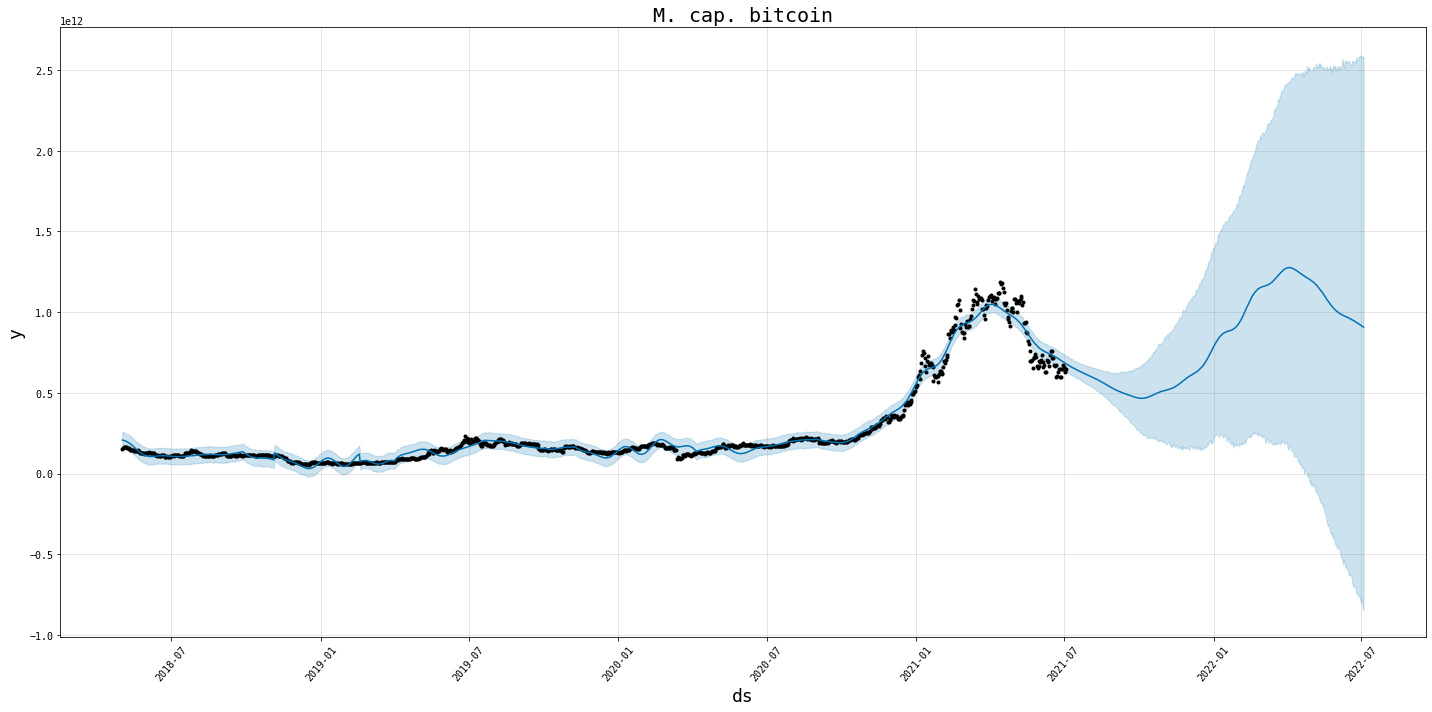

In [255]:
start_timestamp = datetime(2018,5,1)
start_timestamp = datetime.timestamp(start_timestamp)
end_timestamp = datetime.timestamp(datetime.utcnow())
CoinPredict(identifier="bitcoin",start_timestamp=start_timestamp,end_timestamp=end_timestamp, period=365).prophet(mcap=True)